In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [83]:
df_noise = pd.read_csv("Noise.csv")
df_noise.head()

,split,borough,latitude,longitude,year,week,day,hour,1-1_small-sounding-engine_presence,1-2_medium-sounding-engine_presence,1-3_large-sounding-engine_presence,1-X_engine-of-uncertain-size_presence,5-1_car-horn_presence,5-2_car-alarm_presence,1-1_small-sounding-engine_proximity,1-2_medium-sounding-engine_proximity,1-3_large-sounding-engine_proximity,1-X_engine-of-uncertain-size_proximity
0,test,Manhattan,40.72951,-73.99388,2019,43,Friday,8,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled
1,test,Manhattan,40.72951,-73.99388,2019,43,Friday,8,not present,not present,present,not present,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled
2,test,Manhattan,40.72951,-73.99388,2019,43,Friday,8,not present,present,not present,not present,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled
3,test,Manhattan,40.72951,-73.99388,2019,43,Friday,8,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled
4,test,Manhattan,40.72951,-73.99388,2019,43,Friday,8,not present,present,present,not present,not present,not present,not labeled,not labeled,not labeled,not labeled


Ahora voy a ver los años que tengo en el data frame

In [84]:
# Obtener la lista de años únicos
anios_unicos = df_noise['year'].unique()

# Mostrar la lista de años
print(anios_unicos)

[2019 2017 2016 2018]


Hago un filtro para el año 2019 que es el año que voy a trabajar

In [85]:
# Filtrar los datos para el año 2019
df_2019 = df_noise[df_noise['year'] == 2019]
df_2019.head()

,split,borough,latitude,longitude,year,week,day,hour,1-1_small-sounding-engine_presence,1-2_medium-sounding-engine_presence,1-3_large-sounding-engine_presence,1-X_engine-of-uncertain-size_presence,5-1_car-horn_presence,5-2_car-alarm_presence,1-1_small-sounding-engine_proximity,1-2_medium-sounding-engine_proximity,1-3_large-sounding-engine_proximity,1-X_engine-of-uncertain-size_proximity
0,test,Manhattan,40.72951,-73.99388,2019,43,Friday,8,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled
1,test,Manhattan,40.72951,-73.99388,2019,43,Friday,8,not present,not present,present,not present,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled
2,test,Manhattan,40.72951,-73.99388,2019,43,Friday,8,not present,present,not present,not present,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled
3,test,Manhattan,40.72951,-73.99388,2019,43,Friday,8,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled
4,test,Manhattan,40.72951,-73.99388,2019,43,Friday,8,not present,present,present,not present,not present,not present,not labeled,not labeled,not labeled,not labeled


In [86]:
df_2019.describe()

,latitude,longitude,year
count,8840.000000,8840.000000,8840.0
mean,40.725544,-73.991657,2019.0
std,0.017546,0.017468,0.0
min,40.675170,-74.015760,2019.0
25%,40.727920,-73.996290,2019.0
50%,40.729810,-73.994790,2019.0
75%,40.731180,-73.991510,2019.0
max,40.779910,-73.851840,2019.0


In [87]:
print(df_2019.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8840 entries, 0 to 62009
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   split                                   8840 non-null   object 
 1   borough                                 8840 non-null   object 
 2   latitude                                8840 non-null   float64
 3   longitude                               8840 non-null   float64
 4   year                                    8840 non-null   int64  
 5   week                                    8840 non-null   object 
 6   day                                     8840 non-null   object 
 7   hour                                    8840 non-null   object 
 8   1-1_small-sounding-engine_presence      8840 non-null   object 
 9   1-2_medium-sounding-engine_presence     8840 non-null   object 
 10  1-3_large-sounding-engine_presence      8840 non-null   object 


Reemplazo los valores "present" por la semana 44

In [88]:
# Reemplazar "present" por 44 en la columna "week"
df_2019['week'] = df_2019['week'].replace("present", 44)

C:\Users\jerob\AppData\Local\Temp\ipykernel_2392\2249219733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['week'] = df_2019['week'].replace("present", 44)


Creo una columna nueva para los meses del año

In [89]:
# Convertir la columna "week" a tipo numérico, reemplazando "present" por 44
df_2019['week'] = pd.to_numeric(df_2019['week'].replace("present", 44))

# Crear la nueva columna "month" basada en la columna "week"
df_2019['month'] = df_2019['week'].apply(lambda x: math.ceil(x / 4))


C:\Users\jerob\AppData\Local\Temp\ipykernel_2392\3994130854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['week'] = pd.to_numeric(df_2019['week'].replace("present", 44))
C:\Users\jerob\AppData\Local\Temp\ipykernel_2392\3994130854.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['month'] = df_2019['week'].apply(lambda x: math.ceil(x / 4))


In [90]:
df_2019.head()

,split,borough,latitude,longitude,year,week,day,hour,1-1_small-sounding-engine_presence,1-2_medium-sounding-engine_presence,1-3_large-sounding-engine_presence,1-X_engine-of-uncertain-size_presence,5-1_car-horn_presence,5-2_car-alarm_presence,1-1_small-sounding-engine_proximity,1-2_medium-sounding-engine_proximity,1-3_large-sounding-engine_proximity,1-X_engine-of-uncertain-size_proximity,month
0,test,Manhattan,40.72951,-73.99388,2019,43,Friday,8,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,11
1,test,Manhattan,40.72951,-73.99388,2019,43,Friday,8,not present,not present,present,not present,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,11
2,test,Manhattan,40.72951,-73.99388,2019,43,Friday,8,not present,present,not present,not present,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,11
3,test,Manhattan,40.72951,-73.99388,2019,43,Friday,8,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,11
4,test,Manhattan,40.72951,-73.99388,2019,43,Friday,8,not present,present,present,not present,not present,not present,not labeled,not labeled,not labeled,not labeled,11


Coloco la columna "month" a la derecha de "year"

In [91]:
# Obtén el índice de la columna "year"
indice_year = df_2019.columns.get_loc("year")

# Reordena las columnas para colocar "month" a la derecha de "year"
columnas = list(df_2019.columns)
columnas.insert(indice_year + 1, columnas.pop(columnas.index("month")))
df_2019 = df_2019[columnas]


In [92]:
df_2019.head(10)

,split,borough,latitude,longitude,year,month,week,day,hour,1-1_small-sounding-engine_presence,1-2_medium-sounding-engine_presence,1-3_large-sounding-engine_presence,1-X_engine-of-uncertain-size_presence,5-1_car-horn_presence,5-2_car-alarm_presence,1-1_small-sounding-engine_proximity,1-2_medium-sounding-engine_proximity,1-3_large-sounding-engine_proximity,1-X_engine-of-uncertain-size_proximity
0,test,Manhattan,40.72951,-73.99388,2019,11,43,Friday,8,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled
1,test,Manhattan,40.72951,-73.99388,2019,11,43,Friday,8,not present,not present,present,not present,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled
2,test,Manhattan,40.72951,-73.99388,2019,11,43,Friday,8,not present,present,not present,not present,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled
3,test,Manhattan,40.72951,-73.99388,2019,11,43,Friday,8,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled
4,test,Manhattan,40.72951,-73.99388,2019,11,43,Friday,8,not present,present,present,not present,not present,not present,not labeled,not labeled,not labeled,not labeled
5,test,Manhattan,40.72951,-73.99388,2019,11,43,Friday,8,not present,present,present,not present,not present,not present,not labeled,near,near,not labeled
6,test,Manhattan,40.72951,-73.99388,2019,11,43,Friday,8,not present,present,not present,not present,not present,not present,not labeled,far,not labeled,not labeled
7,test,Manhattan,40.72951,-73.99388,2019,11,43,Friday,8,not present,present,not present,not present,not present,not present,not labeled,near,not labeled,not labeled
8,test,Manhattan,40.72951,-73.99388,2019,5,20,present,20,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled
9,test,Manhattan,40.72951,-73.99388,2019,5,20,present,20,not present,not present,present,not present,not labeled,not labeled,not labeled,not labeled,not labeled,not labeled


In [93]:
print(df_2019.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8840 entries, 0 to 62009
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   split                                   8840 non-null   object 
 1   borough                                 8840 non-null   object 
 2   latitude                                8840 non-null   float64
 3   longitude                               8840 non-null   float64
 4   year                                    8840 non-null   int64  
 5   month                                   8840 non-null   int64  
 6   week                                    8840 non-null   int64  
 7   day                                     8840 non-null   object 
 8   hour                                    8840 non-null   object 
 9   1-1_small-sounding-engine_presence      8840 non-null   object 
 10  1-2_medium-sounding-engine_presence     8840 non-null   object 


Histograma de los ruidos por distrito en el año 2019

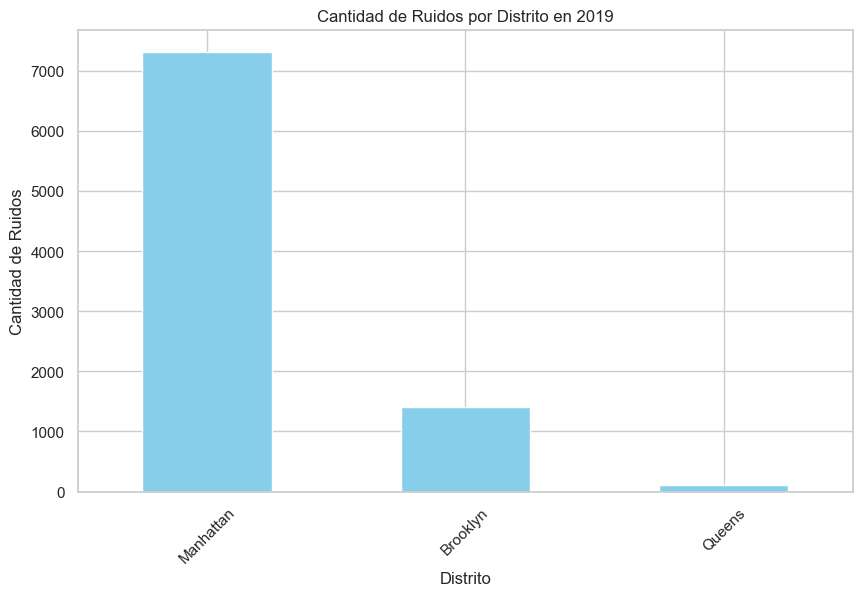

In [94]:
# Filtrar los datos para el año 2019
df_2019 = df_2019[df_2019['year'] == 2019]

# Contar la cantidad de ruidos por distrito
conteo_ruidos_por_distrito = df_2019['borough'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
conteo_ruidos_por_distrito.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Ruidos por Distrito en 2019')
plt.xlabel('Distrito')
plt.ylabel('Cantidad de Ruidos')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()


In [95]:
# Reemplazar los valores numéricos 13 por 12 en la columna "month"
df_2019['month'] = df_2019['month'].replace(13, 12)

Ruidos de cada mes en el año 2019

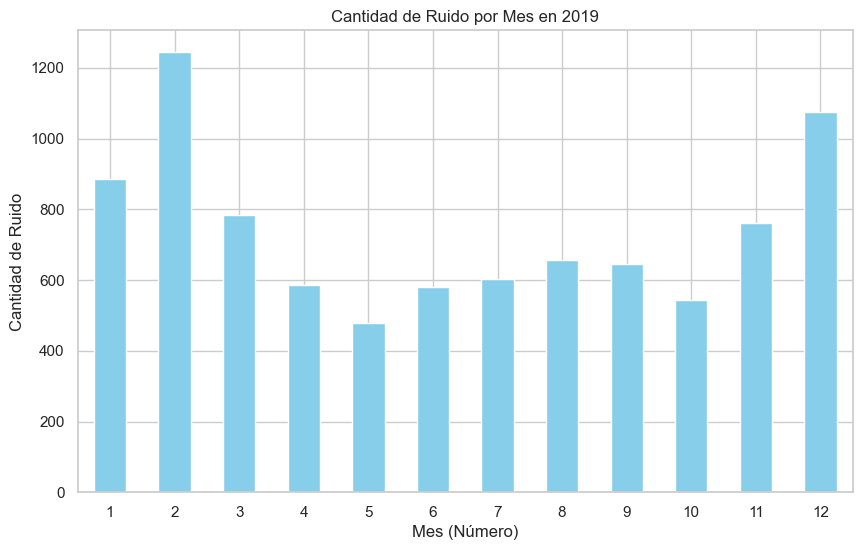

In [96]:
# Contar la cantidad de ruido por valor numérico de "month"
conteo_ruido_por_mes = df_2019['month'].value_counts().sort_index()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
conteo_ruido_por_mes.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Ruido por Mes en 2019')
plt.xlabel('Mes (Número)')
plt.ylabel('Cantidad de Ruido')
plt.xticks(rotation=0)  # Sin rotación de las etiquetas del eje x
plt.show()


Matriz de correlacion para ver la relacion de todas las columnas entre si

C:\Users\jerob\AppData\Local\Temp\ipykernel_2392\1716187356.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric[column] = df_numeric[column].apply(lambda x: 1 if x == 'present' else 0)
C:\Users\jerob\AppData\Local\Temp\ipykernel_2392\1716187356.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric[column] = df_numeric[column].apply(lambda x: 1 if x == 'present' else 0)
C:\Users\jerob\AppData\Local\Temp\ipykernel_2392\1716187356.py:23: SettingWithCopyWarning: 
A value is trying to be se

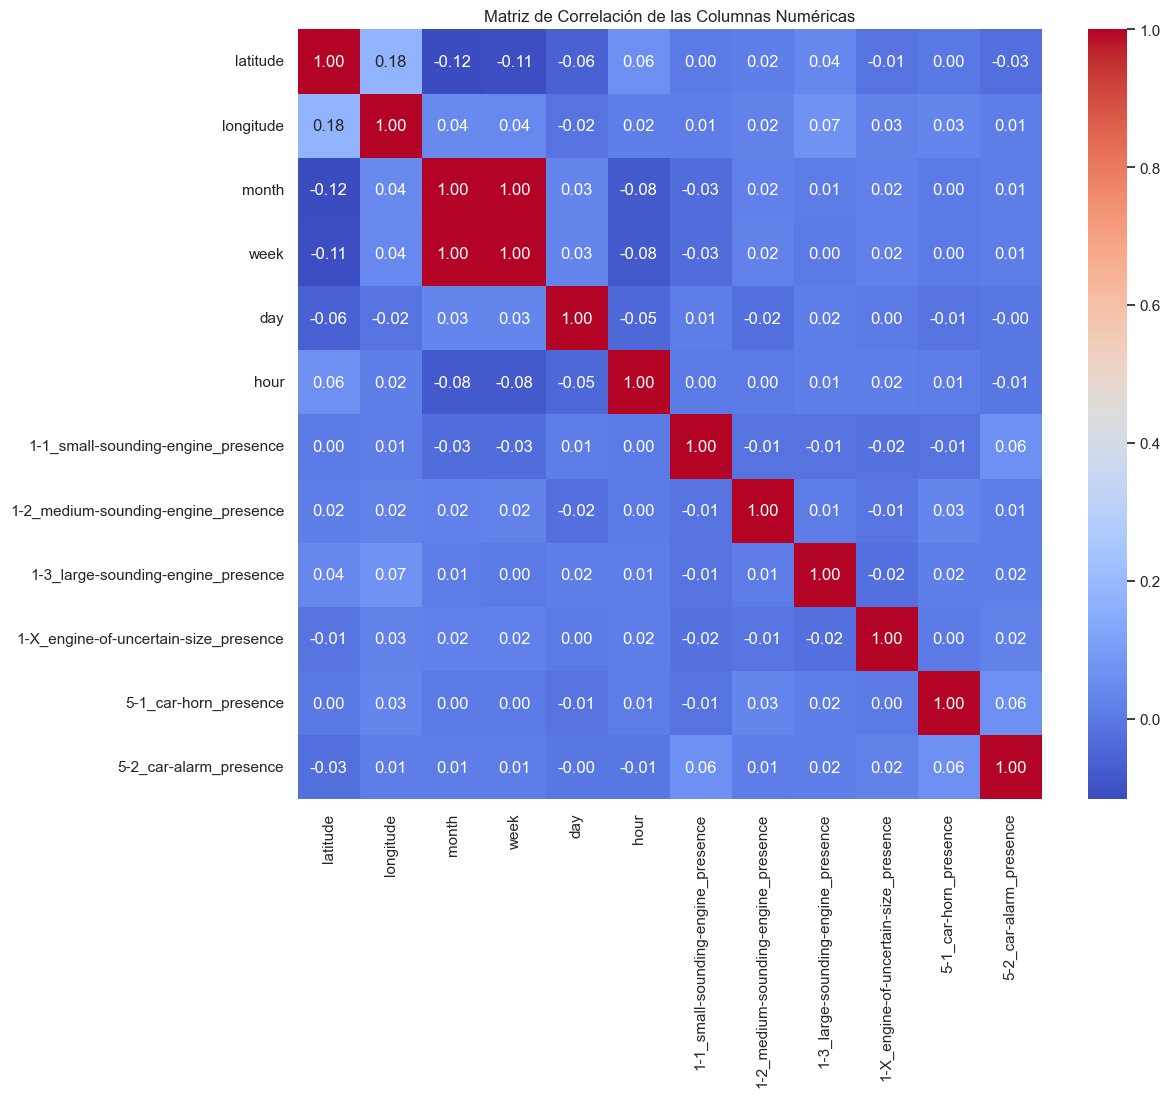

In [97]:
# Selecciona las columnas numéricas para la matriz de correlación
columnas_numericas = [
    "latitude",
    'longitude',
    "month",
    'week',
    'day',
    'hour',
    '1-1_small-sounding-engine_presence',
    '1-2_medium-sounding-engine_presence',
    '1-3_large-sounding-engine_presence',
    '1-X_engine-of-uncertain-size_presence',
    '5-1_car-horn_presence',
    '5-2_car-alarm_presence'
]

# Filtra el DataFrame para incluir solo las columnas numéricas
df_numeric = df_2019[columnas_numericas]

# Convertir columnas "present" o "absent" a variables binarias
for column in df_numeric.columns:
    if df_numeric[column].dtype == 'object':
        df_numeric[column] = df_numeric[column].apply(lambda x: 1 if x == 'present' else 0)

# Calcula la matriz de correlación
correlation_matrix = df_numeric.corr()

# Crea un mapa de calor (heatmap) para visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de las Columnas Numéricas')
plt.show()

Ruidos de bocina de cada mes en el distrito de manhattan

C:\Users\jerob\AppData\Local\Temp\ipykernel_2392\1691054580.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_manhattan[columna_bocina] = df_manhattan[columna_bocina].apply(lambda x: 1 if x == 'present' else 0)


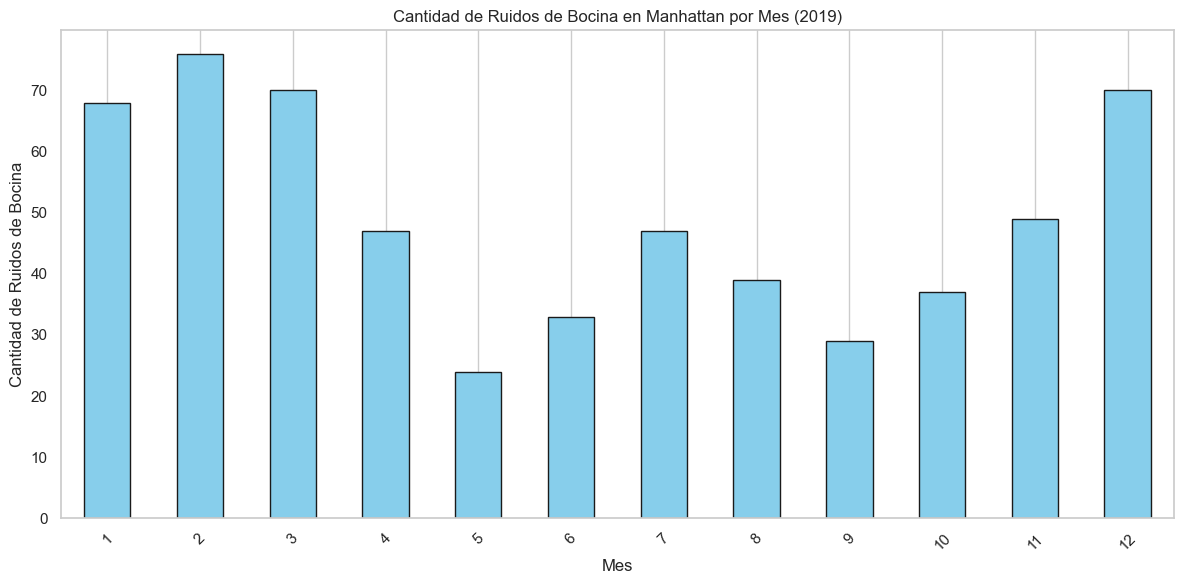

In [98]:
# Filtra los datos para seleccionar solo los registros de Manhattan
df_manhattan = df_2019[df_2019['borough'] == 'Manhattan']

# Selecciona la columna de ruidos de bocina
columna_bocina = '5-1_car-horn_presence'

# Convierte 'present' en 1 y 'absent' en 0
df_manhattan[columna_bocina] = df_manhattan[columna_bocina].apply(lambda x: 1 if x == 'present' else 0)

# Agrupa los datos por mes y suma la presencia de ruido de bocina en cada mes
conteo_por_mes = df_manhattan.groupby('month')[columna_bocina].sum()

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
conteo_por_mes.plot(kind='bar', edgecolor='k', color='skyblue')
plt.title('Cantidad de Ruidos de Bocina en Manhattan por Mes (2019)')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Ruidos de Bocina')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Ruidos de motores menores de cada mes para la ciudad de Manhattan

C:\Users\jerob\AppData\Local\Temp\ipykernel_2392\3357077607.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_manhattan[columna_motores_chicos] = df_manhattan[columna_motores_chicos].apply(lambda x: 1 if x == 'present' else 0)


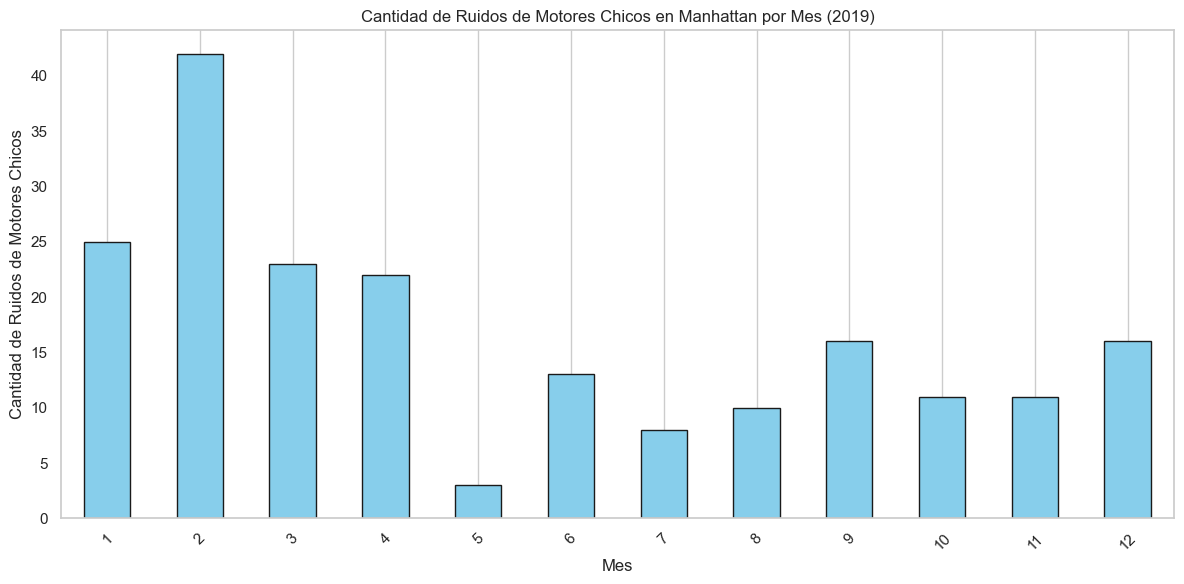

In [99]:
# Filtra los datos para seleccionar solo los registros de Manhattan
df_manhattan = df_2019[df_2019['borough'] == 'Manhattan']

# Selecciona la columna de ruidos de motores chicos
columna_motores_chicos = '1-1_small-sounding-engine_presence'

# Convierte 'present' en 1 y 'absent' en 0
df_manhattan[columna_motores_chicos] = df_manhattan[columna_motores_chicos].apply(lambda x: 1 if x == 'present' else 0)

# Agrupa los datos por mes y suma la presencia de ruido de motores chicos en cada mes
conteo_por_mes = df_manhattan.groupby('month')[columna_motores_chicos].sum()

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
conteo_por_mes.plot(kind='bar', edgecolor='k', color='skyblue')
plt.title('Cantidad de Ruidos de Motores Chicos en Manhattan por Mes (2019)')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Ruidos de Motores Chicos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Ruidos de motores largos de cada mes para el distrito de Manhattan

C:\Users\jerob\AppData\Local\Temp\ipykernel_2392\1398899448.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_manhattan[columna_motores_largos] = df_manhattan[columna_motores_largos].apply(lambda x: 1 if x == 'present' else 0)


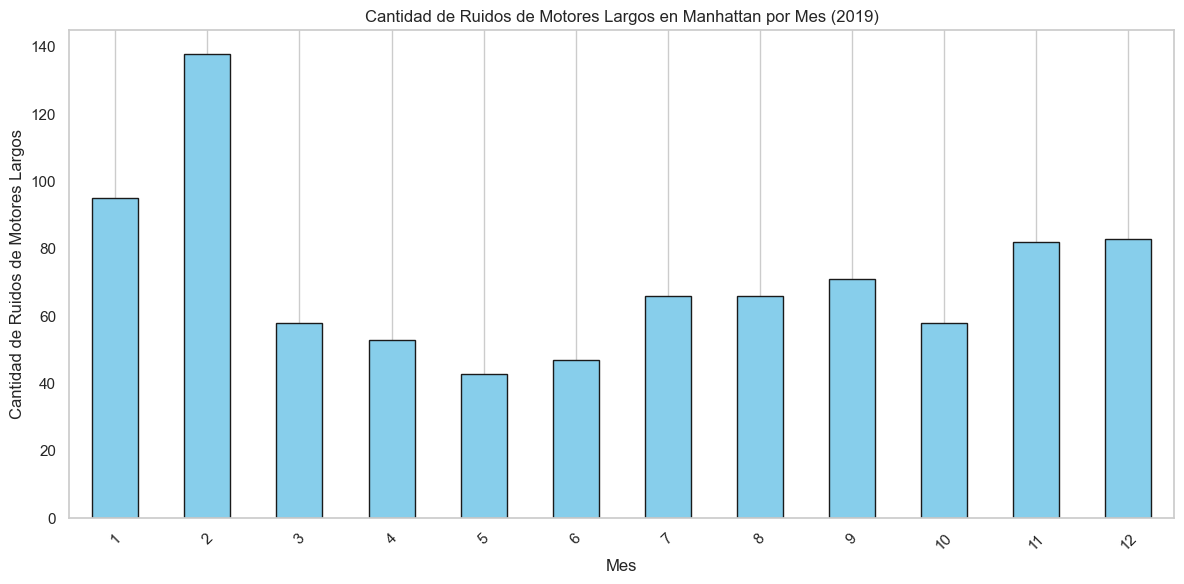

In [100]:
# Filtra los datos para seleccionar solo los registros de Manhattan
df_manhattan = df_2019[df_2019['borough'] == 'Manhattan']

# Selecciona la columna de ruidos de motores largos
columna_motores_largos = '1-3_large-sounding-engine_presence'

# Convierte 'present' en 1 y 'absent' en 0
df_manhattan[columna_motores_largos] = df_manhattan[columna_motores_largos].apply(lambda x: 1 if x == 'present' else 0)

# Agrupa los datos por mes y suma la presencia de ruido de motores largos en cada mes
conteo_por_mes = df_manhattan.groupby('month')[columna_motores_largos].sum()

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
conteo_por_mes.plot(kind='bar', edgecolor='k', color='skyblue')
plt.title('Cantidad de Ruidos de Motores Largos en Manhattan por Mes (2019)')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Ruidos de Motores Largos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
